In [16]:
import numpy as np
import sys
from scipy.linalg import expm
from qiskit_nature.second_q.operators import FermionicOp
from qiskit_nature.second_q.mappers import JordanWignerMapper
from qiskit import QuantumCircuit
import qiskit.quantum_info as qi
from IPython.display import display
from qiskit import transpile
import matplotlib.pyplot as plt


In [17]:
import sys
import os

# Get the current working directory (cwd) of the Jupyter notebook
current_dir = os.getcwd()

# Navigate to the parent directory
parent_dir = os.path.abspath(os.path.join(current_dir, '..'))

# Add the parent directory to sys.path
sys.path.append(parent_dir)

# Now you can import the function from other_script
from double_hopping import *


In [18]:
# Test the construction of the qubit matrix with the Qiskit construction
i = 0
j = 1
k = 3
m = 5
N = 7
t = 1
ops = FermionicOp({"+_" + str(i)+" +_"+str(j)+ " -_" + str(k)+" -_"+str(m) : t,\
                    "+_" + str(m)+" +_"+str(k)+ " -_" + str(j)+" -_"+str(i):-t}, num_spin_orbitals=N)
mapper = JordanWignerMapper()
jw_op = mapper.map(ops)
jw_op = qi.Operator(jw_op).to_matrix()
jw_op = np.array(jw_op)

H = create_double_hopping_fermionic_operator(i, j, k, m, N)
print(ops)
eigH = np.linalg.eig(H)[0]
eigJW = np.linalg.eig(jw_op)[0]
eigH = np.sort(1j*eigH)
eigJW = np.sort(1j*eigJW)
print(f"i = {i}, j = {j}, k = {k}, m = {m}, N = {N}")
print(f"The norm of the eigenvalue of qubit matrix is {np.linalg.norm(eigH)}")
print(f"The norm of the eigenvalue of the JW transformation from Qiskit is {np.linalg.norm(eigJW)}")
print(f"The difference between two eigenvalue vector is {np.sum(abs(eigH - eigJW))}")

Fermionic Operator
number spin orbitals=7, number terms=2
  1 * ( +_0 +_1 -_3 -_5 )
+ -1 * ( +_5 +_3 -_1 -_0 )
i = 0, j = 1, k = 3, m = 5, N = 7
The norm of the eigenvalue of qubit matrix is 4.0
The norm of the eigenvalue of the JW transformation from Qiskit is 3.999999999999999
The difference between two eigenvalue vector is 2.886579864025407e-15


In [19]:
# Check the difference between qubit matrix and the fermionic matrix
N = 7
i = 0
j = 1
k = 4
m = 6
t = 1
H = create_double_hopping_fermionic_operator(i, j, k, m, N)
M = create_qubit_double_hopping_matrix(i,j,k,m,N)
# print(H)
print(f"The difference between the fermionic operator and the qubit operator is {np.sum(abs(H-M))}")

The difference between the fermionic operator and the qubit operator is 0.0


In [20]:
# Check one component of the circuit 
N = 10
i = 0
j = 3
k = 6
m = 9
t = 10
qc = QuantumCircuit(N)
gate_set = ["Y", "X", "Y", "Y"]
create_circuit_components(qc,i,j,k,m,t,N, gate_set)
M = create_double_hopping_qubit_exponent(i, j, k, m, t, N, gate_set)
# print(M)
m = qi.Operator(qc).to_matrix()
m = np.array(m)
print(np.sum(abs(m-M)))

4.547473508864641e-13


In [21]:
# Check the circuit matrix with the qubit matrix
N = 5
i = 0
j = 1
k = 3
m = 4
t = 1
qc = create_double_hopping_circuit(i,j,k,m,t,N)
M = qi.Operator(qc).to_matrix()
M = np.array(M)
H = create_double_hopping_fermionic_operator(i, j, k, m, N)
expH = expm(t*H)
# print(expH)
print(np.sum(M-expH))

(-1.6986412276764895e-13+0j)


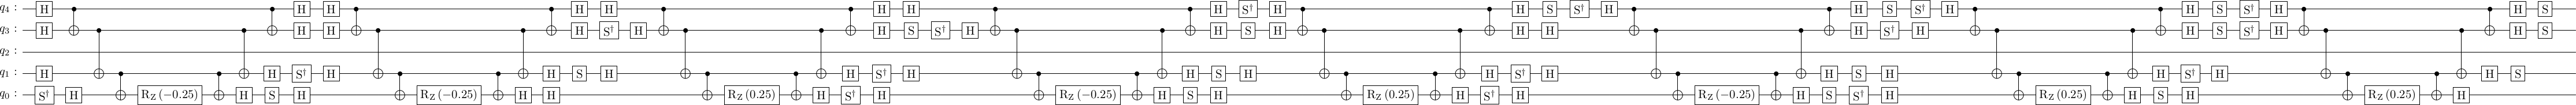

In [22]:
# Draw the matrix
display(qc.draw("latex", reverse_bits=True))